# 1. Keyword Search

In [6]:
import requests
import pandas as pd

# API key
api_key = 'PYV795sFJXDJShcDk2z8GdAA8lTExWGb'

#Article Search : Search for NYT articles by keywords, filters and facets.
# !!!!!The Article Search API returns a max of 10 results at a time. 
# page=0 for results 1-10, page=1 for 11-20, ...)up to 100 pages (1,000 results). 

q = 'q=debt+ceiling&page=0&sort=relevance&begin_date=20120101&end_date=20121231'
url_keyword ='https://api.nytimes.com/svc/search/v2/articlesearch.json?'+ q +'&api-key='+ api_key

In [7]:
# Request
def request_api(url):
    r = requests.get(url)
    json_data = r.json()
    keys = json_data.keys()

    if 'results' in keys:
        df = pd.DataFrame(json_data['results'])

    if 'response' in keys:
        df = pd.DataFrame(json_data['response']['docs'])
    
    return df

In [21]:
df_keyword = request_api(url_keyword)
df_keyword['headline'] = df_keyword['headline'].apply(lambda x: x['main'])
df_keyword[['abstract','headline','pub_date','keywords','news_desk','print_page','print_section']]

,abstract,headline,pub_date,keywords,news_desk,print_page,print_section
0,The Times’s Annie Lowrey reports on how the 20...,"The Debt Ceiling, Then and Now",2012-12-14T19:44:46+0000,[],Politics,NaN,NaN
1,Congressional leaders have made clear that the...,Debt Ceiling Complicates a Tax Shift,2012-11-09T02:21:16+0000,"[{'name': 'organizations', 'value': 'Senate', ...",Business,1,B
2,A summary of what’s on today’s editorial page.,Opinion Report: The Debt Ceiling,2012-05-16T12:13:12+0000,[],,NaN,NaN
3,Will Democrats invoke the 14th amendment to pr...,The Debt Ceiling Escape Hatch,2012-06-21T16:15:29+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN
4,Financial markets and credit rating agencies a...,Debt Ceiling Rises Again as Threat for the U.S.,2012-12-21T14:37:27+0000,"[{'name': 'persons', 'value': 'Geithner, Timot...",Business,1,B
5,Republicans will cast votes disapproving of th...,Protest Vote Set on Debt Ceiling,2012-01-17T22:43:34+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN
6,Ron Paul is taking a day out of presidential c...,Paul to Break From Trail for Debt Ceiling Vote,2012-01-17T22:25:28+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN
7,"In a report released Monday, the Government Ac...",Debt-Ceiling Fight Raised Borrowing Costs by $...,2012-07-24T00:45:17+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN
8,President Obama said he would not let a clash ...,Obama and House Republicans Offer Taste of Ren...,2012-05-16T17:53:13+0000,"[{'name': 'subject', 'value': 'United States P...",National,19,A
9,Speaker John A. Boehner appears to be girding ...,Boehner to Double Down on Debt Rule,2012-05-15T16:25:20+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN


In [26]:
pd.DataFrame(df_keyword.keywords.values[1]) # subject: National Debt (US)

,name,value,rank,major
0,organizations,Senate,1,N
1,glocations,United States,2,N
2,persons,"Reid, Harry",3,N
3,subject,United States Politics and Government,4,N
4,subject,Credit Ratings and Credit Rating Agencies,5,N
5,subject,National Debt (US),6,N
6,subject,Taxation,7,N
7,organizations,House of Representatives,8,N
8,subject,Federal Budget (US),9,N
9,subject,Federal Taxes (US),10,N


# 2. Concept Search

In [8]:
url_concept = 'http://api.nytimes.com/svc/semantic/v2/concept/search.json?query=National Debt (US)&concept_type=nytd_des&api-key='+ api_key
requests.get(url_concept).json()

{'copyright': 'Copyright (c) 2021 The New York Times Company. All Rights Reserved.',
 'fields': [],
 'num_results': 1,
 'results': [{'concept_created': '"2009-10-28 14:30:04-04:00"',
   'concept_gender': None,
   'concept_id': 17096,
   'concept_is_locked_by': 'dai.ichikawa@nytimes.com',
   'concept_locked_at': '"2023-04-04 09:35:14-04:00"',
   'concept_name': 'National Debt (US)',
   'concept_rule': '(OR,(OR,_headline:"national debt",_headline:"u.s. budget deficit","Gramm-Rudman-Hollings"),(AND,(MINOC_2,"debt-to-G.D.P.","debt-to-GDP","debt ceiling","debt limit","debt talks","deficit hawkery","deficit hawks","federal budget deficit","federal deficit","federal debt","national debt"),(OR,"america","americans","boehner","bush","congress","geithner","g.o.p.","the house","obama","reid","republicans","senate","treasury","trump","u.s.","united states")),(PAR,(OR,"federal budget deficit","federal debt","government debt","national debt","trillion deficit"),(OR,"congressional budget office","gro

In [9]:
url_debt = 'http://api.nytimes.com/svc/semantic/v2/concept/name/nytd_des/National Debt (US)?fields=all&api-key='+ api_key
results = requests.get(url_debt).json()['results'][0]

In [10]:
df3 = pd.DataFrame(results['article_list']['results'])

In [14]:
df3

,body,byline,concepts,date,document_type,title,type_of_material,url
0,The president also said that he was not yet pr...,By Katie Rogers,{'nytd_des': ['United States Politics and Gove...,2023-05-06T01:47:07+0000,article,"Asked About Age, Biden Says He Knows ‘More Tha...",News,https://www.nytimes.com/2023/05/05/us/politics...
1,Neither Biden nor McCarthy has much incentive ...,By Peter Coy,"{'nytd_des': ['internal-sub-only-nl', 'Credit ...",2023-05-05T19:00:04+0000,article,Why Debt Chicken Is Such a Dangerous Game,Op-Ed,https://www.nytimes.com/2023/05/05/opinion/deb...
2,But don’t give in to Republican extortion.,By Paul Krugman,"{'nytd_des': ['National Debt (US)', 'Federal B...",2023-05-04T23:00:06+0000,article,Doing Whatever It Takes on Debt,Op-Ed,https://www.nytimes.com/2023/05/04/opinion/bid...
3,The president has not wavered in his calls for...,By Jim Tankersley,{'nytd_des': ['United States Politics and Gove...,2023-05-04T18:46:48+0000,article,"With Default Looming, What Can Biden Do?",News,https://www.nytimes.com/2023/05/04/us/politics...
4,A long-shot Democratic effort to force a debt-...,By Catie Edmondson,"{'nytd_des': ['National Debt (US)', 'Federal B...",2023-05-03T21:28:02+0000,article,Meet the House Republicans Who Democrats Hope ...,News,https://www.nytimes.com/2023/05/03/us/politics...
5,The central bank must consider how looming U.S...,By Alan Rappeport,"{'nytd_des': ['National Debt (US)', 'United St...",2023-05-03T16:05:37+0000,article,The Debt Limit Standoff is a New Economic Head...,News,https://www.nytimes.com/2023/05/03/business/de...
6,Some Biden administration officials believe a ...,By Linda Qiu,{'nytd_des': ['United States Politics and Gove...,2023-05-02T18:56:16+0000,article,Why the 14th Amendment Is Being Cited in the D...,News,https://www.nytimes.com/2023/05/02/us/politics...
7,Congress controls how much money the United St...,By Alan Rappeport,"{'nytd_des': ['Federal Budget (US)', 'Budgets ...",2023-05-02T16:54:07+0000,article,Everything You Need to Know About the Debt Cei...,News,https://www.nytimes.com/2023/05/02/business/ec...
8,House Democratic leaders who have been quietly...,By Carl Hulse,"{'nytd_des': ['National Debt (US)', 'Law and L...",2023-05-02T15:53:54+0000,article,House Democrats Move to Force a Debt-Limit Inc...,News,https://www.nytimes.com/2023/05/02/us/politics...
9,As the government heads toward a possible defa...,By Jim Tankersley,{'nytd_des': ['Fourteenth Amendment (US Consti...,2023-05-02T15:06:44+0000,article,Is the Debt Limit Constitutional? Biden Aides ...,News,https://www.nytimes.com/2023/05/02/us/politics...


In [13]:
df3[["date","title","body"]]

,date,title,body
0,2023-05-06T01:47:07+0000,"Asked About Age, Biden Says He Knows ‘More Tha...",The president also said that he was not yet pr...
1,2023-05-05T19:00:04+0000,Why Debt Chicken Is Such a Dangerous Game,Neither Biden nor McCarthy has much incentive ...
2,2023-05-04T23:00:06+0000,Doing Whatever It Takes on Debt,But don’t give in to Republican extortion.
3,2023-05-04T18:46:48+0000,"With Default Looming, What Can Biden Do?",The president has not wavered in his calls for...
4,2023-05-03T21:28:02+0000,Meet the House Republicans Who Democrats Hope ...,A long-shot Democratic effort to force a debt-...
5,2023-05-03T16:05:37+0000,The Debt Limit Standoff is a New Economic Head...,The central bank must consider how looming U.S...
6,2023-05-02T18:56:16+0000,Why the 14th Amendment Is Being Cited in the D...,Some Biden administration officials believe a ...
7,2023-05-02T16:54:07+0000,Everything You Need to Know About the Debt Cei...,Congress controls how much money the United St...
8,2023-05-02T15:53:54+0000,House Democrats Move to Force a Debt-Limit Inc...,House Democratic leaders who have been quietly...
9,2023-05-02T15:06:44+0000,Is the Debt Limit Constitutional? Biden Aides ...,As the government heads toward a possible defa...


In [118]:
df1

,body,byline,concepts,date,document_type,title,type_of_material,url
0,Some Biden administration officials believe a ...,By Linda Qiu,{'nytd_des': ['United States Politics and Gove...,2023-05-02T18:56:16+0000,article,Why the 14th Amendment Is Being Cited in the D...,News,https://www.nytimes.com/2023/05/02/us/politics...
1,Congress controls how much money the United St...,By Alan Rappeport,"{'nytd_des': ['Federal Budget (US)', 'Budgets ...",2023-05-02T16:54:07+0000,article,Everything You Need to Know About the Debt Cei...,News,https://www.nytimes.com/2023/05/02/business/ec...
2,House Democratic leaders who have been quietly...,By Carl Hulse,"{'nytd_des': ['Law and Legislation', 'Federal ...",2023-05-02T15:53:54+0000,article,House Democrats Move to Force a Debt-Limit Inc...,News,https://www.nytimes.com/2023/05/02/us/politics...
3,As the government heads toward a possible defa...,By Jim Tankersley,{'nytd_des': ['Fourteenth Amendment (US Consti...,2023-05-02T15:06:44+0000,article,Is the Debt Limit Constitutional? Biden Aides ...,News,https://www.nytimes.com/2023/05/02/us/politics...
4,President Biden said he would meet with lawmak...,By Alan Rappeport and Jim Tankersley,{'nytd_des': ['United States Politics and Gove...,2023-05-01T20:25:39+0000,article,"U.S. Could Run Out of Cash by June 1, Yellen W...",News,https://www.nytimes.com/2023/05/01/us/politics...
5,The looming crisis over the U.S. debt ceiling ...,"By Michael Barbaro, Rikki Novetsky, Mary Wilso...","{'nytd_des': ['audio-neutral-informative', 'Un...",2023-05-01T10:00:08+0000,article,Kevin McCarthy’s Debt Ceiling Dilemma,News,https://www.nytimes.com/2023/05/01/podcasts/th...
6,The Treasury Department’s ability to delay a d...,By Alan Rappeport,{'nytd_des': ['United States Politics and Gove...,2023-05-01T09:00:12+0000,article,Trickling Tax Revenue Complicates Debt Limit T...,News,https://www.nytimes.com/2023/05/01/us/politics...
7,"The speaker’s all-carrots, no-sticks approach ...",By Catie Edmondson,"{'nytd_des': ['National Debt (US)', 'Federal B...",2023-04-28T22:25:34+0000,article,McCarthy Brought His Detractors in From the Co...,News,https://www.nytimes.com/2023/04/28/us/politics...
8,Speaker Kevin McCarthy squeezed a debt ceiling...,By Carl Hulse,{'nytd_des': ['United States Politics and Gove...,2023-04-27T21:42:17+0000,article,The Real Debt Limit Fight Is Yet to Come,News Analysis,https://www.nytimes.com/2023/04/27/us/politics...
9,After Republicans passed a bill that pairs spe...,By Jim Tankersley,"{'nytd_des': ['National Debt (US)', 'Federal B...",2023-04-27T16:11:11+0000,article,Biden Faces His First Big Choice on Debt Limit,News,https://www.nytimes.com/2023/04/27/us/politics...


In [121]:
df2

,body,byline,concepts,date,document_type,title,type_of_material,url
0,A long-shot Democratic effort to force a debt-...,By Catie Edmondson,{'nytd_des': ['United States Politics and Gove...,2023-05-03T21:28:02+0000,article,Meet the House Republicans Who Democrats Hope ...,News,https://www.nytimes.com/2023/05/03/us/politics...
1,The central bank must consider how looming U.S...,By Alan Rappeport,"{'nytd_des': ['National Debt (US)', 'United St...",2023-05-03T16:05:37+0000,article,The Debt Limit Standoff is a New Economic Head...,News,https://www.nytimes.com/2023/05/03/business/de...
2,Some Biden administration officials believe a ...,By Linda Qiu,{'nytd_des': ['United States Politics and Gove...,2023-05-02T18:56:16+0000,article,Why the 14th Amendment Is Being Cited in the D...,News,https://www.nytimes.com/2023/05/02/us/politics...
3,Congress controls how much money the United St...,By Alan Rappeport,"{'nytd_des': ['Federal Budget (US)', 'Budgets ...",2023-05-02T16:54:07+0000,article,Everything You Need to Know About the Debt Cei...,News,https://www.nytimes.com/2023/05/02/business/ec...
4,House Democratic leaders who have been quietly...,By Carl Hulse,"{'nytd_des': ['National Debt (US)', 'Law and L...",2023-05-02T15:53:54+0000,article,House Democrats Move to Force a Debt-Limit Inc...,News,https://www.nytimes.com/2023/05/02/us/politics...
5,As the government heads toward a possible defa...,By Jim Tankersley,{'nytd_des': ['Fourteenth Amendment (US Consti...,2023-05-02T15:06:44+0000,article,Is the Debt Limit Constitutional? Biden Aides ...,News,https://www.nytimes.com/2023/05/02/us/politics...
6,President Biden said he would meet with lawmak...,By Alan Rappeport and Jim Tankersley,{'nytd_des': ['United States Politics and Gove...,2023-05-01T20:25:39+0000,article,"U.S. Could Run Out of Cash by June 1, Yellen W...",News,https://www.nytimes.com/2023/05/01/us/politics...
7,The looming crisis over the U.S. debt ceiling ...,"By Michael Barbaro, Rikki Novetsky, Mary Wilso...","{'nytd_des': ['audio-neutral-informative', 'Un...",2023-05-01T10:00:08+0000,article,Kevin McCarthy’s Debt Ceiling Dilemma,News,https://www.nytimes.com/2023/05/01/podcasts/th...
8,The Treasury Department’s ability to delay a d...,By Alan Rappeport,{'nytd_des': ['United States Politics and Gove...,2023-05-01T09:00:12+0000,article,Trickling Tax Revenue Complicates Debt Limit T...,News,https://www.nytimes.com/2023/05/01/us/politics...
9,"The speaker’s all-carrots, no-sticks approach ...",By Catie Edmondson,"{'nytd_des': ['National Debt (US)', 'Federal B...",2023-04-28T22:25:34+0000,article,McCarthy Brought His Detractors in From the Co...,News,https://www.nytimes.com/2023/04/28/us/politics...


In [127]:
# widen the column width
pd.set_option('display.max_colwidth', -1)

#select date,title,body
df_news = df2[['date','title','body']]

#set date format as YYYY-MM-DD
df_news['date'] = df_news['date'].apply(lambda x: x[:10])

df_news

/var/folders/q_/2syhc8zd0bzd52v4kv8xp4g80000gq/T/ipykernel_67523/4198358555.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
/var/folders/q_/2syhc8zd0bzd52v4kv8xp4g80000gq/T/ipykernel_67523/4198358555.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['date'] = df_news['date'].apply(lambda x: x[:10])


,date,title,body
0,2023-05-03,Meet the House Republicans Who Democrats Hope Will Defect on the Debt Limit,A long-shot Democratic effort to force a debt-limit increase to the floor hinges on at least five G.O.P. defections. These House Republicans are considered the likeliest.
1,2023-05-03,The Debt Limit Standoff is a New Economic Headwind for the Fed,The central bank must consider how looming U.S. default could impact the economy as it makes a decision on raising interest rates.
2,2023-05-02,Why the 14th Amendment Is Being Cited in the Debt Ceiling Debate,Some Biden administration officials believe a constitutional clause prevents the United States from failing to make payments even if it means breaching the debt limit.
3,2023-05-02,Everything You Need to Know About the Debt Ceiling,Congress controls how much money the United States can borrow. Here’s a look at why that is and what it means.
4,2023-05-02,House Democrats Move to Force a Debt-Limit Increase as Default Date Looms,House Democratic leaders who have been quietly planning a strategy to force a debt ceiling increase to avert default began taking steps on Tuesday to deploy their secret weapon.
5,2023-05-02,Is the Debt Limit Constitutional? Biden Aides Are Debating It.,"As the government heads toward a possible default on its debt as soon as next month, officials are entertaining a legal theory that previous administrations ruled out."
6,2023-05-01,"U.S. Could Run Out of Cash by June 1, Yellen Warns",President Biden said he would meet with lawmakers on May 9 to discuss ways to avoid a default.
7,2023-05-01,Kevin McCarthy’s Debt Ceiling Dilemma,The looming crisis over the U.S. debt ceiling may soon require the House speaker to make a painful choice.
8,2023-05-01,Trickling Tax Revenue Complicates Debt Limit Talks,"The Treasury Department’s ability to delay a default, the so-called X-date, hinges on how fast the money is coming in."
9,2023-04-28,McCarthy Brought His Detractors in From the Cold. Will They Stay?,"The speaker’s all-carrots, no-sticks approach of empowering hard-right Republicans carries risks, and any negotiation with President Biden on the debt ceiling is likely to test them."


In [131]:
# concat all columns into text
df_news['text'] = df_news['date'] + ' ' + df_news['title'] + ' ' + df_news['body']
text = df_news['text'].str.cat(sep='\n')
text

/var/folders/q_/2syhc8zd0bzd52v4kv8xp4g80000gq/T/ipykernel_67523/2133755156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['text'] = df_news['date'] + ' ' + df_news['title'] + ' ' + df_news['body']


'2023-05-03 Meet the House Republicans Who Democrats Hope Will Defect on the Debt Limit A long-shot Democratic effort to force a debt-limit increase to the floor hinges on at least five G.O.P. defections. These House Republicans are considered the likeliest.\n2023-05-03 The Debt Limit Standoff is a New Economic Headwind for the Fed The central bank must consider how looming U.S. default could impact the economy as it makes a decision on raising interest rates.\n2023-05-02 Why the 14th Amendment\xa0Is Being Cited in the Debt Ceiling Debate Some Biden administration officials believe a constitutional clause prevents the United States from failing to make payments even if it means breaching the debt limit.\n2023-05-02 Everything You Need to Know About the Debt Ceiling Congress controls how much money the United States can borrow. Here’s a look at why that is and what it means.\n2023-05-02 House Democrats Move to Force a Debt-Limit Increase as Default Date Looms House Democratic leaders wh

In [138]:
# use open AI to analyze the sentiment of the article

from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)
prompt = PromptTemplate(
    input_variables=["text"],
    template="""This is a collection of news about US debt ceiling: {text}, each news is seperated by \n and contains date, title and body. Based on the text, to \
        1. Analyze the attitude towards the debt ceiling crisis in the news. \
        2. Summary the news in one sentence by date. \
        3. Generate a newletter in Markdown format including date, summary and the news of the day. \
        """
)

In [139]:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm, prompt=prompt)

# Run the chain only specifying the input variable.
result = chain.run(text)
print(result)



1. The attitude towards the debt ceiling crisis in the news is one of urgency and concern. The news reports emphasize the need for a solution to the crisis, as well as the potential economic consequences of a default. There is also discussion of potential strategies to avert a default, such as the use of the 14th Amendment or forcing a debt-limit increase.

2. On May 3, House Republicans were identified as potential defectors in a Democratic effort to force a debt-limit increase (2023-05-03); on May 2, the Biden administration debated the constitutionality of the debt limit (2023-05-02); on May 1, Treasury Secretary Yellen warned of a possible cash shortage by June 1 (2023-05-01); and on April 28, House Speaker McCarthy's approach to empowering hard-right Republicans was tested (2023-04-28).

3. # Debt Ceiling Newsletter

## May 3, 2023

**Meet the House Republicans Who Democrats Hope Will Defect on the Debt Limit**

A long-shot Democratic effort to force a debt-limit increase to the

In [140]:
import openai

def get_completion(prompt, model="gpt-3.5-turbo"): 
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [173]:
prompt = f"""
Your task is to generate a newsletter from the text below. \
The text is a list of articles (date, title and abstract) about US debt ceiling. \
Generate a newsletter in HTML format including: \
1. Summary the news for each date. \
2. Analyze the attitude towards the debt ceiling in one word for each news and list all attitude words for the day.\
For example: \
<date> \
<summary> \
<attitude> \

News text: ```{text}```
"""
response = get_completion(prompt)
print(response)

<!DOCTYPE html>
<html>
<head>
	<title>US Debt Ceiling Newsletter</title>
</head>
<body>
	<h1>US Debt Ceiling Newsletter</h1>
	<h2>May 3, 2023</h2>
	<p><strong>Meet the House Republicans Who Democrats Hope Will Defect on the Debt Limit</strong></p>
	<p>A long-shot Democratic effort to force a debt-limit increase to the floor hinges on at least five G.O.P. defections. These House Republicans are considered the likeliest.</p>
	<p><strong>Attitude: Hopeful</strong></p>
	<h2>May 3, 2023</h2>
	<p><strong>The Debt Limit Standoff is a New Economic Headwind for the Fed</strong></p>
	<p>The central bank must consider how looming U.S. default could impact the economy as it makes a decision on raising interest rates.</p>
	<p><strong>Attitude: Concerned</strong></p>
	<h2>May 2, 2023</h2>
	<p><strong>Why the 14th Amendment Is Being Cited in the Debt Ceiling Debate</strong></p>
	<p>Some Biden administration officials believe a constitutional clause prevents the United States from failing to make paym

In [174]:
# show HTML content
from IPython.core.display import display, HTML
display(HTML(response))

# 3. Article Achieve

In [142]:
#read all json files and concat into one dataframe
import glob
import pandas as pd
import json

path = r'/Users/jiayue.yuan/Documents/GitHub/post_covid/nytimes_json' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    with open(filename) as f:
        data = json.load(f)
        df = pd.DataFrame(data['response']['docs'])
        li.append(df)

df_all = pd.concat(li, axis=0, ignore_index=True)

In [144]:
print(df_all.pub_date.max())
print(df_all.pub_date.min())

2023-04-30T17:38:33+0000
2007-07-07T14:46:20+0000


In [145]:
df_all.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,"Quotation of the Day for Monday, April 1, 2019.",https://www.nytimes.com/2019/03/31/todayspaper/quotation-of-the-day-ripped-off-riffs-better-not-to-risk-it.html,"Quotation of the Day for Monday, April 1, 2019.",“I shouldn’t be thinking about legal precedent when I am trying to write a chorus.”,A,3,The New York Times,[],"{'main': 'Quotation of the Day: Ripped-Off Riffs? Better Not to Risk It', 'kicker': None, 'content_kicker': None, 'print_headline': 'Quote of the Day', 'name': None, 'seo': None, 'sub': None}",[],2019-04-01T00:03:11+0000,article,Summary,Today’s Paper,"{'original': '', 'person': [], 'organization': None}",Quote,nyt://article/3f320ac1-19a5-56c8-bee4-739132fb4e34,47,nyt://article/3f320ac1-19a5-56c8-bee4-739132fb4e34,NaN
1,"Istanbul, the president’s hometown and stronghold, seemed poised to slip through his fingers in municipal elections that signaled a political earthquake.",https://www.nytimes.com/2019/03/31/world/europe/turkey-election-erdogan.html,"Istanbul, the president’s hometown and stronghold, seemed poised to slip through his fingers in municipal elections that signaled a political earthquake.","ISTANBUL — President Recep Tayyip Erdogan confronted the prospect of a stunning political defeat on Monday, as local voting in Turkey showed his party had lost the capital, Ankara, and possibly Istanbul, its largest city and his key base of support for many years.",A,6,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2019/03/31/world/31turkey-sub/merlin_152898507_48f377ee-70db-44b5-8b50-36472ea6be81-articleLarge.jpg', 'height': 400, 'width': 600, 'subType': 'xlarge', 'crop_name': 'articleLarge', 'legacy': {'xlarge': 'images/2019/03/31/world/31turkey-sub/merlin_152898507_48f377ee-70db-44b5-8b50-36472ea6be81-articleLarge.jpg', 'xlargewidth': 600, 'xlargeheight': 400}}, {'rank': 0, 'subtype': 'jumbo', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2019/03/31/world/31turkey-sub/merlin_152898507_48f377ee-70db-44b5-8b50-36472ea6be81-jumbo.jpg', 'height': 683, 'width': 1024, 'subType': 'jumbo', 'crop_name': 'jumbo', 'legacy': {}}, {'rank': 0, 'subtype': 'superJumbo', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2019/03/31/world/31turkey-sub/merlin_152898507_48f377ee-70db-44b5-8b50-36472ea6be81-superJumbo.jpg', 'height': 1365, 'width': 2048, 'subType': 'superJumbo', 'crop_name': 'superJumbo', 'legacy': {}}, {'rank': 0, 'subtype': 'thumbnail', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2019/03/31/world/31turkey-sub/31turkey-sub-thumbStandard.jpg', 'height': 75, 'width': 75, 'subType': 'thumbnail', 'crop_name': 'thumbStandard', 'legacy': {'thumbnail': 'images/2019/03/31/world/31turkey-sub/31turkey-sub-thumbStandard.jpg', 'thumbnailwidth': 75, 'thumbnailheight': 75}}, {'rank': 0, 'subtype': 'thumbLarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2019/03/31/world/31turkey-sub/31turkey-sub-thumbLarge.jpg', 'height': 150, 'width': 150, 'subType': 'thumbLarge', 'crop_name': 'thumbLarge', 'legacy': {}}]","{'main': 'Erdogan, Turkey’s Leader, Staring at Major Electoral Defeat', 'kicker': None, 'content_kicker': None, 'print_headline': 'Erdogan Loses Ground in Local Elections', 'name': None, 'seo': None, 'sub': None}","[{'name': 'persons', 'value': 'Erdogan, Recep Tayyip', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'value': 'Elections', 'rank': 2, 'major': 'N'}, {'name': 'glocations', 'value': 'Turkey', 'rank': 3, 'major': 'N'}, {'name': 'subject', 'value': 'Politics and Government', 'rank': 4, 'major': 'N'}, {'name': 'organizations', 'value': 'Justice and Development Party (Turkey)', 'rank': 5, 'major': 'N'}, {'name': 'organizations', 'value': 'Republican People's Party (T

In [146]:
# convert "keywords" to string
df_test = df_all.copy()
df_test['keywords'] = df_test['keywords'].apply(lambda x: str(x))
#count the length
df_count = df_test['keywords'].apply(lambda x: len(x)).value_counts().to_frame()

In [147]:
df_count["ratio"] = df_count['keywords']/df_count['keywords'].sum()
df_count

,keywords,ratio
2,130475,0.131956
83,13931,0.014089
79,6332,0.006404
76,4405,0.004455
377,3984,0.004029
...,...,...
3202,1,0.000001
2905,1,0.000001
2825,1,0.000001
3110,1,0.000001


In [148]:
df_debt = df_all[df_all['keywords'].apply(lambda x: 'National Debt (US)' in str(x))]
df_debt['pub_date'] = pd.to_datetime(df_debt['pub_date']).dt.date

# save to csv
df_debt.to_csv('/Users/jiayue.yuan/Documents/GitHub/FinAI/case_study/debt_ceiling/debt_ceiling_nyt.csv', index=False)

/var/folders/q_/2syhc8zd0bzd52v4kv8xp4g80000gq/T/ipykernel_67523/1204414175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debt['pub_date'] = pd.to_datetime(df_debt['pub_date']).dt.date


# 4. debt ceiling topic

In [1]:
import pandas as pd
import os
 
dir = os.getcwd()

df_debt = pd.read_csv(dir + '/debt_ceiling_nyt.csv')

In [2]:
df_debt.sort_values(by = "pub_date")

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
217,China lent an estimated 4.6 percent of the mon...,https://www.nytimes.com/2010/01/23/business/ec...,China lent an estimated 4.6 percent of the mon...,THE United States government borrowed more mon...,B,3.0,The New York Times,[],{'main': 'Debt Burden Now Rests More on U.S. S...,"[{'name': 'subject', 'value': 'United States E...",2010-01-22,article,Business,Business Day,"{'original': 'By Floyd Norris', 'person': [{'f...",News,nyt://article/79c17158-9fe5-5285-98e0-f882c02b...,551,nyt://article/79c17158-9fe5-5285-98e0-f882c02b...,Economy
218,The group could provide pressure and political...,https://www.nytimes.com/2010/01/25/us/politics...,The group could provide pressure and political...,WASHINGTON  Just as President Obama and Congr...,A,3.0,The New York Times,[],{'main': 'Independent Group to Look at Ways to...,"[{'name': 'organizations', 'value': 'Democrati...",2010-01-25,article,National,U.S.,"{'original': 'By Jackie Calmes', 'person': [{'...",News,nyt://article/8e9bbddd-2a51-5d72-b4bf-41106b1f...,634,nyt://article/8e9bbddd-2a51-5d72-b4bf-41106b1f...,Politics
220,A plan for a bipartisan commission to press fo...,https://www.nytimes.com/2010/01/27/us/politics...,A plan for a bipartisan commission to press fo...,WASHINGTON  Advocates of more aggressive step...,A,1.0,The New York Times,[],{'main': 'President Plans Own Panel on the Deb...,"[{'name': 'persons', 'value': 'Gregg, Judd', '...",2010-01-26,article,National,U.S.,"{'original': 'By Jackie Calmes', 'person': [{'...",News,nyt://article/40e5a378-78bd-56ab-98f1-abb4c944...,1251,nyt://article/40e5a378-78bd-56ab-98f1-abb4c944...,Politics
219,President Obama will call for a three-year fre...,https://www.nytimes.com/2010/01/26/us/politics...,President Obama will call for a three-year fre...,WASHINGTON  President Obama will call for a t...,A,1.0,The New York Times,"[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",{'main': 'Obama to Seek Spending Freeze to Tri...,"[{'name': 'subject', 'value': 'United States P...",2010-01-26,article,National,U.S.,"{'original': 'By Jackie Calmes', 'person': [{'...",News,nyt://article/2e786e46-7dcc-599a-95d7-a0d86bb0...,1145,nyt://article/2e786e46-7dcc-599a-95d7-a0d86bb0...,Politics
222,The announcement of a limited spending freeze ...,https://www.nytimes.com/video/us/politics/1247...,The announcement of a limited spending freeze ...,The announcement of a limited spending freeze ...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",{'main': 'Turning the Focus to Fiscal Restrain...,"[{'name': 'persons', 'value': 'Obama, Barack',...",2010-01-27,multimedia,NaN,U.S.,"{'original': 'Ben Werschkul', 'person': [{'fir...",Video,nyt://video/4a205d51-a927-5b19-b201-1ba3dec12503,0,nyt://video/4a205d51-a927-5b19-b201-1ba3dec12503,Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,"The Republican bill, which would raise the deb...",https://www.nytimes.com/video/us/politics/1000...,"The Republican bill, which would raise the deb...","The Republican bill, which would raise the deb...",NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'House Republicans Pass Debt Ceiling ...,"[{'name': 'subject', 'value': 'National Debt (...",2023-04-26,multimedia,NaN,U.S.,{'original': 'By Reuters and U.S. Network Pool...,Video,nyt://video/05b390d2-179f-5872-9d26-b6df3875bcdf,0,nyt://video/05b390d2-179f-5872-9d26-b6df3875bcdf,Politics
35,The president omitted key context when discuss...,https://www.nytimes.com/2023/04/26/us/politics...,The president omitted key context when discuss...,WASHINGTON — Since announcing his re-election ...,A,15.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Fact-Checking the Kickoff to Biden’s...,"[{

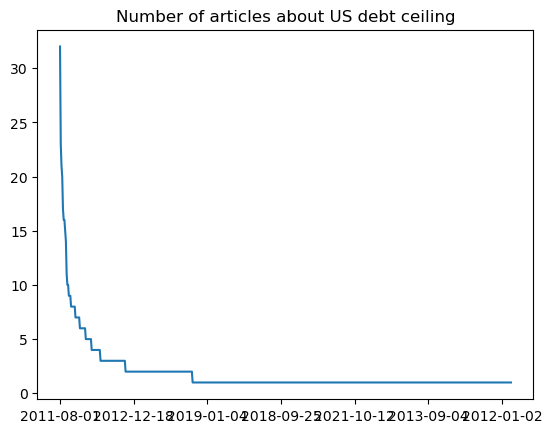

In [3]:
# plot the number of articles for each day
import matplotlib.pyplot as plt
df_debt['pub_date'].value_counts().plot()
#add title
plt.title('Number of articles about US debt ceiling')
plt.show()

In [34]:
# convert string in headline to dictionary
df_debt['headline'] = df_debt['headline'].apply(lambda x: eval(x))
df_debt["title"] = df_debt["headline"].apply(lambda x: x['main'])

In [45]:
# sort by pub_date
df_debt = df_debt.sort_values(by = "pub_date")

# reindex
df_debt = df_debt.reset_index(drop=True)

In [48]:
df_embedding = df_debt.tail(100)[["title", "pub_date"]]

In [49]:
df_embedding

,title,pub_date
1075,Donald Trump and the Peril to Democracy,2022-02-02
1076,Wonking Out: Very Serious Folk Economics,2022-02-11
1077,Democrats Weigh Gas Tax Holiday and Deficit Cu...,2022-02-16
1078,"Somehow, Trump Is a Tough Act to Follow",2022-02-21
1079,Seven Lessons Democrats Need to Learn — Fast,2022-04-28
...,...,...
1170,House Republicans Pass Debt Ceiling Bill,2023-04-26
1171,Fact-Checking the Kickoff to Biden’s Re-electi...,2023-04-26
1172,Biden Faces His First Big Choice on Debt Limit,2023-04-27
1173,The Real Debt Limit Fight Is Yet to Come,2023-04-27


In [35]:
df_debt.embeddings = df_debt.title.apply(lambda x: get_embedding(x))

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,...,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name,title
0,M.M.T.’s fans include Alexandria Ocasio-Cortez...,https://www.nytimes.com/2019/04/05/business/ec...,M.M.T.’s fans include Alexandria Ocasio-Cortez...,The package of eccentric ideas known as modern...,BU,1.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Modern Monetary Theory Finds an Embr...,"[{'name': 'subject', 'value': 'United States E...",...,article,SundayBusiness,Business Day,"{'original': 'By Patricia Cohen', 'person': [{...",News,nyt://article/0f5c568c-f321-5777-a50a-c23b02c3...,2366,nyt://article/0f5c568c-f321-5777-a50a-c23b02c3...,Economy,Modern Monetary Theory Finds an Embrace in an ...
1,The Democrats’ argument over fiscal policy rep...,https://www.nytimes.com/2010/07/08/us/politics...,The Democrats’ argument over fiscal policy rep...,WASHINGTON  In case you’ve been out of the co...,A,1.0,The New York Times,[],"{'main': 'For Democrats, Debt Debate and Famil...","[{'name': 'organizations', 'value': 'Democrati...",...,article,National,U.S.,"{'original': 'By Matt Bai', 'person': [{'first...",News,nyt://article/65d2c111-0273-5084-9b21-4c7ab7f3...,1031,nyt://article/65d2c111-0273-5084-9b21-4c7ab7f3...,Politics,"For Democrats, Debt Debate and Familiar Ring o..."
2,How my Republican Party destroyed the American...,https://www.nytimes.com/2010/08/01/opinion/01s...,How my Republican Party destroyed the American...,IF there were such a thing as Chapter 11 for p...,WK,9.0,The New York Times,[],{'main': 'Four Deformations of the Apocalypse'...,"[{'name': 'subject', 'value': 'United States E...",...,article,OpEd,Opinion,"{'original': 'By DAVID STOCKMAN', 'person': [{...",Op-Ed,nyt://article/d5118300-d04e-54a1-b3ca-6318a6c2...,1325,nyt://article/d5118300-d04e-54a1-b3ca-6318a6c2...,NaN,Four Deformations of the Apocalypse
3,"Flat population could be a problem, but it can...",https://www.nytimes.com/2021/05/17/opinion/low...,"Flat population could be a problem, but it can...",Last week the Bureau of Labor Statistics repor...,A,22.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Learning to Live With Low Fertility'...,"[{'name': 'subject', 'value': 'Population', 'r...",...,article,OpEd,Opinion,"{'original': 'By Paul Krugman', 'person': [{'f...",Op-Ed,nyt://article/b9f6b00b-51fc-5074-8af4-3b8465f4...,836,nyt://article/b9f6b00b-51fc-5074-8af4-3b8465f4...,NaN,Learning to Live With Low Fertility
4,The president’s plans to invest in infrastruct...,https://www.nytimes.com/2021/05/27/business/ec...,The president’s plans to invest in infrastruct...,WASHINGTON — President Biden will propose a $6...,A,1.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Biden to Propose $6 Trillion Budget ...,"[{'name': 'subject', 'value': 'Federal Budget ...",...,article,Washington,Business Day,"{'original': 'By Jim Tankersley', 'person': [{...",News,nyt://article/a7d3e8ef-d104-51c8-a5b9-fd0c9480...,1562,nyt://article/a7d3e8ef-d104-51c8-a5b9-fd0c9480...,Economy,Biden to Propose $6 Trillion Budget to Make U....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,Listening to the House of Representatives deba...,https://www.nytimes.com/2013/01/26/opinion/col...,Listening to the House of Representatives deba...,"When I was a kid, my parents would occasionall...",A,19.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Goldilocks and the 3 Politicians', '...","[{'name': 'subject', 'value': 'Federal Budget ...",...,article,Editorial,Opinion,"{'original': 'By Gail Collins', 'person': [{'f...",Op-Ed,nyt://article/35b38823-5420-5650-a175-40b997bc...,799,nyt://article/35b38823-5420-5650-a175-40b997bc...,NaN,Goldilocks and the 3 Politicians
1171,Representative Eric Cantor is reasserting him

# 5 similarity

In [36]:
import openai
from openai.embeddings_utils import cosine_similarity

def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   text = text.lower()
   return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

In [30]:
title1 = "Meet the House Republicans Who Democrats Hope Will Defect on the Debt Limit"
title2 = "The Debt Limit Standoff is a New Economic Headwind for the Fed"
title3 = "The Debt Limit is a Dangerous Game. Here's How to End It."
topic1 = "US Debt Ceiling"
topic2 = "The sentence is talking about US debt ceiling"

In [26]:
# lower case, bigger sim
embedding_title1 = get_embedding(title1.lower())
embedding_topic1 = get_embedding(topic1.lower())
embedding_topic2 = get_embedding(topic2.lower())


In [31]:
embedding_title2 = get_embedding(title2.lower())

In [28]:
cosine_similarity(embedding_title1, embedding_topic1)

0.835956142594623

In [27]:
cosine_similarity(embedding_title1, embedding_topic2)

0.8313712891188034

In [32]:
cosine_similarity(embedding_title2, embedding_topic1)

0.8708022588345585